___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

This is a "***Fraud Detection Project***". 

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, only  interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

***Logistic Regression, Random Forest, Neural Network*** algorithms will be implemented and ***SMOTE*** technique will be performed since the target variable are quite imbalanced.

At the end of the project, our model will be deployed by ***Flask API***.

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Feature Information:

+ Time: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset.

+ Features V1, V2, ... V28 are the principal components obtained with PCA.

+ Amount: This feature is the transaction Amount, can be used for example-dependant cost-senstive learning.

+ Class: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

The aim of this project is to predict whether a credit card transaction is fraudulent. 


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.float_format', lambda x: '%.1f' % x)
font_title = {'family': 'times new roman', 'color': 'darkred', 'weight': 'bold', 'size': 14}


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.4,-0.1,2.5,1.4,-0.3,0.5,0.2,0.1,0.4,...,-0.0,0.3,-0.1,0.1,0.1,-0.2,0.1,-0.0,149.6,0
1,0.0,1.2,0.3,0.2,0.4,0.1,-0.1,-0.1,0.1,-0.3,...,-0.2,-0.6,0.1,-0.3,0.2,0.1,-0.0,0.0,2.7,0
2,1.0,-1.4,-1.3,1.8,0.4,-0.5,1.8,0.8,0.2,-1.5,...,0.2,0.8,0.9,-0.7,-0.3,-0.1,-0.1,-0.1,378.7,0
3,1.0,-1.0,-0.2,1.8,-0.9,-0.0,1.2,0.2,0.4,-1.4,...,-0.1,0.0,-0.2,-1.2,0.6,-0.2,0.1,0.1,123.5,0
4,2.0,-1.2,0.9,1.5,0.4,-0.4,0.1,0.6,-0.3,0.8,...,-0.0,0.8,-0.1,0.1,-0.2,0.5,0.2,0.2,70.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Exploratory Data Analysis

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,...,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94813.9,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.3,0.0
std,47488.1,2.0,1.7,1.5,1.4,1.4,1.3,1.2,1.2,1.1,...,0.7,0.7,0.6,0.6,0.5,0.5,0.4,0.3,250.1,0.0
min,0.0,-56.4,-72.7,-48.3,-5.7,-113.7,-26.2,-43.6,-73.2,-13.4,...,-34.8,-10.9,-44.8,-2.8,-10.3,-2.6,-22.6,-15.4,0.0,0.0
25%,54201.5,-0.9,-0.6,-0.9,-0.8,-0.7,-0.8,-0.6,-0.2,-0.6,...,-0.2,-0.5,-0.2,-0.4,-0.3,-0.3,-0.1,-0.1,5.6,0.0
50%,84692.0,0.0,0.1,0.2,-0.0,-0.1,-0.3,0.0,0.0,-0.1,...,-0.0,0.0,-0.0,0.0,0.0,-0.1,0.0,0.0,22.0,0.0
75%,139320.5,1.3,0.8,1.0,0.7,0.6,0.4,0.6,0.3,0.6,...,0.2,0.5,0.1,0.4,0.4,0.2,0.1,0.1,77.2,0.0
max,172792.0,2.5,22.1,9.4,16.9,34.8,73.3,120.6,20.0,15.6,...,27.2,10.5,22.5,4.6,7.5,3.5,31.6,33.8,25691.2,1.0


In [5]:
print(f'Duplicate items in this dataset is: {df.duplicated().sum()}')

Duplicate items in this dataset is: 1081


In [6]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.5,0.9,1.3,0.1,0.4,0.1,0.7,0.2,-0.3,...,0.0,0.2,-0.2,0.0,0.1,-0.6,-0.1,0.0,6.1,0
35,26.0,-0.5,0.9,1.4,0.1,0.4,0.1,0.7,0.2,-0.3,...,0.0,0.2,-0.2,0.0,0.1,-0.6,-0.1,0.0,1.8,0
113,74.0,1.0,0.1,0.2,1.1,0.4,0.9,-0.0,0.4,0.1,...,0.1,0.6,0.0,-0.6,0.5,-0.2,0.1,0.0,1.2,0
114,74.0,1.0,0.1,0.2,1.1,0.4,0.9,-0.0,0.4,0.1,...,0.1,0.6,0.0,-0.6,0.5,-0.2,0.1,0.0,1.2,0
115,74.0,1.0,0.1,0.2,1.1,0.4,0.9,-0.0,0.4,0.1,...,0.1,0.6,0.0,-0.6,0.5,-0.2,0.1,0.0,1.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.9,-0.5,-1.8,0.5,2.1,4.2,-0.9,1.1,1.0,...,-0.5,-1.3,0.5,0.6,-0.3,-1.1,0.1,-0.0,12.0,0
283483,171627.0,-1.5,1.4,0.8,-0.6,-0.7,-0.5,-0.3,0.9,0.1,...,0.3,0.9,-0.2,0.1,0.0,0.6,0.2,0.1,6.8,0
283485,171627.0,-1.5,1.4,0.8,-0.6,-0.7,-0.5,-0.3,0.9,0.1,...,0.3,0.9,-0.2,0.1,0.0,0.6,0.2,0.1,11.9,0
284191,172233.0,-2.7,3.2,-3.4,1.0,-0.4,-0.1,-0.7,2.3,-1.6,...,0.4,0.3,-0.1,-0.1,0.1,-0.5,-1.2,-0.2,55.7,0


In [7]:
# Drop duplicate records
df = df[~df.duplicated()]
df.shape

(283726, 31)

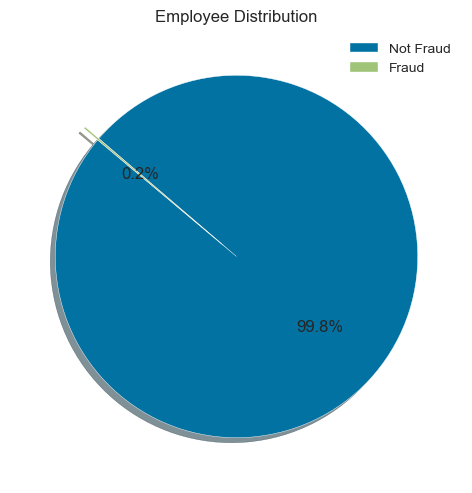

In [8]:
plt.figure(figsize=(6,6))
explode = [0,0.1]
plt.pie(df['Class'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Not Fraud','Fraud'])
plt.title('Employee Distribution')
plt.axis('off');

Only 492 (or 0.2%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.

In [9]:
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.1,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,88.4
1,80450.5,-4.5,3.4,-6.7,4.5,-3.0,-1.4,-5.2,1.0,-2.5,...,0.4,0.5,0.1,-0.1,-0.1,0.0,0.1,0.2,0.1,123.9


In [10]:
fraud = df[df["Class"] == 1] 
normal = df[df["Class"] == 0]
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,...,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0
mean,80450.5,-4.5,3.4,-6.7,4.5,-3.0,-1.4,-5.2,1.0,-2.5,...,0.5,0.1,-0.1,-0.1,0.0,0.1,0.2,0.1,123.9,1.0
std,48636.2,6.6,4.1,6.9,2.9,5.3,1.7,6.9,5.6,2.5,...,2.7,1.2,1.5,0.5,0.8,0.5,1.2,0.5,260.2,0.0
min,406.0,-30.6,-8.4,-31.1,-1.3,-22.1,-6.4,-43.6,-41.0,-13.4,...,-22.8,-8.9,-19.3,-2.0,-4.8,-1.2,-7.3,-1.9,0.0,1.0
25%,41203.0,-5.6,1.1,-7.9,2.3,-4.3,-2.5,-7.0,-0.2,-3.8,...,0.0,-0.5,-0.3,-0.4,-0.3,-0.3,-0.0,-0.1,1.0,1.0
50%,73408.0,-2.3,2.6,-4.9,4.1,-1.4,-1.4,-2.9,0.6,-2.1,...,0.6,0.1,-0.1,-0.1,0.1,0.0,0.4,0.1,9.8,1.0
75%,129095.0,-0.4,4.6,-2.2,6.3,0.3,-0.4,-0.9,1.7,-0.8,...,1.2,0.6,0.3,0.3,0.5,0.4,0.8,0.4,105.9,1.0
max,170348.0,2.1,22.1,2.3,12.1,11.1,6.5,5.8,20.0,3.4,...,27.2,8.4,5.5,1.1,2.2,2.7,3.1,1.8,2125.9,1.0


In [11]:
normal.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283253.0,283253.0,283253.0,283253.0,283253.0,283253.0,283253.0,283253.0,283253.0,283253.0,...,283253.0,283253.0,283253.0,283253.0,283253.0,283253.0,283253.0,283253.0,283253.0,283253.0
mean,94835.1,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,...,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,88.4,0.0
std,47475.6,1.9,1.6,1.5,1.4,1.4,1.3,1.2,1.2,1.1,...,0.7,0.7,0.6,0.6,0.5,0.5,0.4,0.3,250.4,0.0
min,0.0,-56.4,-72.7,-48.3,-5.7,-113.7,-26.2,-31.8,-73.2,-6.3,...,-34.8,-10.9,-44.8,-2.8,-10.3,-2.6,-22.6,-15.4,0.0,0.0
25%,54233.0,-0.9,-0.6,-0.9,-0.9,-0.7,-0.8,-0.6,-0.2,-0.6,...,-0.2,-0.5,-0.2,-0.4,-0.3,-0.3,-0.1,-0.1,5.7,0.0
50%,84711.0,0.0,0.1,0.2,-0.0,-0.1,-0.3,0.0,0.0,-0.1,...,-0.0,0.0,-0.0,0.0,0.0,-0.1,0.0,0.0,22.0,0.0
75%,139308.0,1.3,0.8,1.0,0.7,0.6,0.4,0.6,0.3,0.6,...,0.2,0.5,0.1,0.4,0.4,0.2,0.1,0.1,77.5,0.0
max,172792.0,2.5,18.9,9.4,16.9,34.8,73.3,120.6,18.7,15.6,...,22.6,10.5,22.5,4.6,7.5,3.5,31.6,33.8,25691.2,0.0


In [12]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,473.0,283253.0
mean,123.9,88.4
std,260.2,250.4
min,0.0,0.0
25%,1.0,5.7
50%,9.8,22.0
75%,105.9,77.5
max,2125.9,25691.2


In [13]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,473.0,283253.0
mean,80450.5,94835.1
std,48636.2,47475.6
min,406.0,0.0
25%,41203.0,54233.0
50%,73408.0,84711.0
75%,129095.0,139308.0
max,170348.0,172792.0


### Data Cleaning
Check Missing Values and Outliers

In [14]:
def missing_values(df):
        mis_val = df.isnull().sum()        
        mis_val_percent = 100 * df.isnull().sum() / len(df)        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)        
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})        
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)        
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"+"There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")        
        return mis_val_table_ren_columns
    
missing_values(df)

Dataframe has 31 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## 2. Data Preprocessing

#### Scaling

In [15]:
X = df.drop('Class', axis = 1)
y = df['Class']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)
X_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.0,-0.7,-0.0,1.7,1.0,-0.2,0.3,0.2,0.1,0.3,...,0.3,-0.0,0.4,-0.2,0.1,0.2,-0.4,0.3,-0.1,0.2
1,-2.0,0.6,0.2,0.1,0.3,0.0,-0.1,-0.1,0.1,-0.2,...,-0.1,-0.3,-0.9,0.2,-0.6,0.3,0.3,-0.0,0.0,-0.3
2,-2.0,-0.7,-0.8,1.2,0.3,-0.4,1.4,0.6,0.2,-1.4,...,0.7,0.3,1.1,1.5,-1.1,-0.6,-0.3,-0.1,-0.2,1.2
3,-2.0,-0.5,-0.1,1.2,-0.6,-0.0,0.9,0.2,0.3,-1.3,...,-0.3,-0.1,0.0,-0.3,-1.9,1.2,-0.5,0.2,0.2,0.1
4,-2.0,-0.6,0.5,1.0,0.3,-0.3,0.1,0.5,-0.2,0.7,...,0.5,-0.0,1.1,-0.2,0.2,-0.4,1.0,0.6,0.7,-0.1


#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify = y, random_state=42)

In [17]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
86568,-0.7,0.6,-0.0,0.2,0.5,-0.0,0.3,-0.2,0.1,0.6,...,-0.1,-0.2,-0.1,-0.2,-1.2,1.1,1.0,0.0,0.0,-0.3
251557,1.3,-0.1,0.7,-0.5,-0.4,0.5,-0.5,0.5,0.2,-0.1,...,-0.1,0.5,1.7,-0.1,0.8,-1.4,-0.5,1.0,0.8,-0.3
20232,-1.3,-0.9,0.9,1.0,1.5,0.5,0.8,0.9,-0.5,-0.2,...,1.1,-0.7,-0.6,-0.4,-1.4,-0.3,-0.1,0.0,0.3,0.0
68952,-0.9,0.4,-0.7,0.3,0.4,-0.7,0.4,-0.5,0.2,-0.9,...,-0.1,-0.1,-0.2,-0.3,-0.6,0.5,-0.6,0.1,0.2,0.6
191852,0.7,1.0,0.1,-1.2,0.4,0.3,-0.5,0.0,-0.1,0.5,...,-0.2,0.0,0.5,-0.0,-0.7,0.2,1.3,-0.1,-0.1,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56516,-1.0,-0.6,0.5,1.3,1.2,0.8,-0.1,0.1,0.3,-1.2,...,0.0,0.4,0.7,-0.2,0.2,-0.2,-0.2,0.2,0.4,-0.3
188431,0.7,-1.0,1.3,-1.4,-0.7,-0.1,-0.0,-0.5,1.5,-0.4,...,0.0,-0.3,-1.1,0.3,-0.6,-0.2,0.4,0.1,-0.0,-0.3
115561,-0.4,0.6,-0.1,0.8,0.6,-0.8,-0.2,-0.5,0.1,0.9,...,-0.2,-0.1,-0.2,0.1,0.7,0.5,0.7,0.0,0.1,-0.3
187644,0.7,1.1,0.1,-1.2,0.1,0.5,-0.2,0.1,-0.1,0.2,...,-0.1,-0.5,-1.2,0.4,0.2,-0.4,0.4,-0.2,-0.1,-0.3


In [18]:
y_test

86568     0
251557    0
20232     0
68952     0
191852    0
         ..
56516     0
188431    0
115561    0
187644    0
8267      0
Name: Class, Length: 56746, dtype: int64

In [19]:
y_train

226238    0
134253    0
186465    0
149493    0
18461     0
         ..
225116    0
3525      0
242674    0
60594     0
67057     0
Name: Class, Length: 226980, dtype: int64

In [20]:
y_test.value_counts()

0    56651
1       95
Name: Class, dtype: int64

## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE


***Model Training***

In [21]:
lr = LogisticRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)

***Prediction and Model Evaluating***

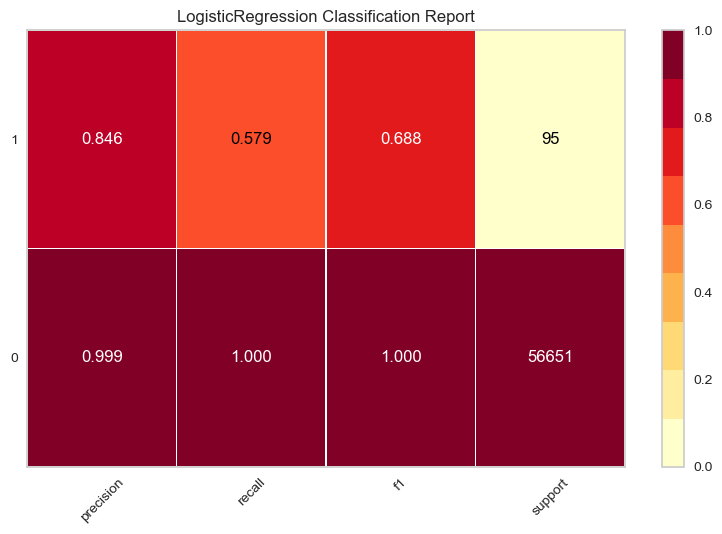

In [22]:
visualizer = ClassificationReport(lr, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

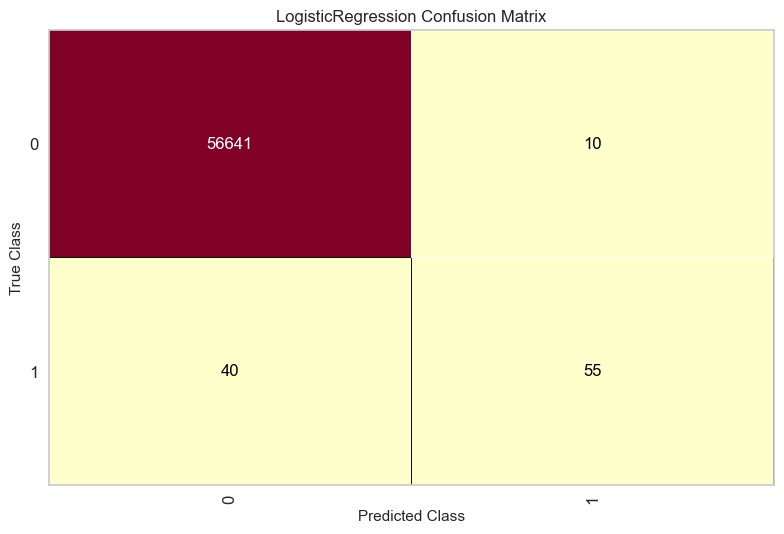

In [23]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(lr)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***Plot Precision and Recall Curve***

In [24]:
from sklearn.metrics import average_precision_score
y_score = lr.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score, pos_label = 1)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.69


<Figure size 1000x1000 with 0 Axes>

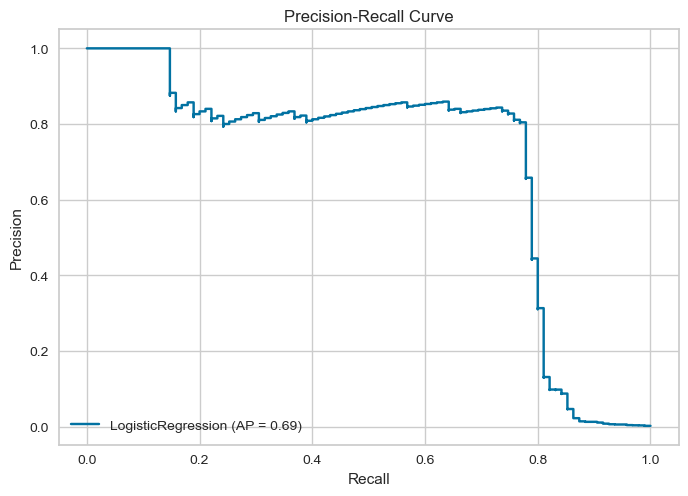

In [25]:
from sklearn.metrics import plot_precision_recall_curve

plt.figure(figsize=(10,10))
disp = plot_precision_recall_curve(lr, X_test, y_test)
disp.ax_.set_title('Precision-Recall Curve');

***Apply and Plot StratifiedKFold***

In [26]:
def Evaluation(n, est, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]    
        
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        acc_scores.append(est.score(X_test, y_test))
        pre_scores.append(precision_score(y_test, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1)) 

    print(f'Accuracy: %{np.mean(acc_scores)*100:.2f} std %{np.std(acc_scores)*100:.2f}')
    print(f'Precision 1: %{np.mean(pre_scores)*100:.2f} std %{np.std(pre_scores)*100:.2f}')
    print(f'Recall 1: %{np.mean(rec_scores)*100:.2f} std %{np.std(rec_scores)*100:.2f}')
    print(f'F1_score 1: %{np.mean(f1_scores)*100:.2f} std  %{np.std(f1_scores)*100:.2f}') 

Evaluation(10, LogisticRegression(), X_scaled, y)


Accuracy: %99.92 std %0.02
Precision 1: %86.43 std %5.92
Recall 1: %60.08 std %6.82
F1_score 1: %70.70 std  %6.04


### Apply SMOTE

In [27]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [28]:
sm = SMOTE(random_state=42)
X_smoted, y_smoted = sm.fit_sample(X_train, y_train)
print('y_smoted dataset shape {}'.format(Counter(y_smoted)))

y_smoted dataset shape Counter({0: 226602, 1: 226602})


In [29]:
X_smoted

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.0,1.1,-1.0,-1.4,-1.8,0.7,2.7,-1.5,0.7,-1.2,...,-0.4,-0.2,-0.1,0.4,1.1,-0.4,-0.3,0.1,-0.2,-0.2
1,-0.3,-0.7,1.0,0.4,-0.0,-0.3,-0.7,0.2,0.6,-1.2,...,-0.1,-0.3,-1.3,0.5,0.9,-1.4,-0.6,-0.0,0.2,-0.3
2,0.7,1.0,0.0,-1.4,0.1,0.8,0.5,-0.0,0.2,0.3,...,-0.3,0.4,1.5,-0.1,-2.8,0.2,0.0,0.1,-0.2,-0.3
3,-0.1,0.9,0.2,0.2,2.7,0.0,0.8,-0.6,0.2,0.6,...,-0.3,0.2,1.0,0.3,1.2,-0.4,-0.0,-0.0,-0.1,-0.3
4,-1.4,0.7,-0.7,0.4,-1.1,-0.9,0.2,-1.0,0.2,-1.9,...,-0.5,-0.5,-0.9,0.4,-0.6,-0.1,-0.9,0.2,0.0,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453199,1.6,-1.4,0.4,-3.4,1.3,-0.8,-2.0,-1.5,0.8,-1.6,...,0.7,0.9,-0.4,-0.3,-0.4,-0.2,1.4,1.8,-0.5,0.8
453200,1.0,-0.6,1.0,-2.0,1.7,2.5,-2.2,-4.7,-1.9,-1.0,...,0.7,-1.1,-0.3,-9.1,1.1,-2.9,-1.3,2.0,1.4,-0.3
453201,-0.4,-0.8,1.3,-1.9,1.9,-1.5,-0.6,-1.9,0.8,-1.4,...,0.3,0.9,0.5,0.1,-0.7,-0.2,-0.4,0.9,0.1,0.2
453202,-0.4,0.6,0.8,-0.9,1.5,0.6,-0.8,0.3,-0.1,-0.0,...,-0.0,-0.5,-0.9,-0.2,-0.2,1.3,-0.7,0.3,0.4,-0.3


In [30]:
y_smoted

0         0
1         0
2         0
3         0
4         0
         ..
453199    1
453200    1
453201    1
453202    1
453203    1
Name: Class, Length: 453204, dtype: int64

### Logistic Regression with SMOTE


***Model Training***

In [31]:
lr_s = LogisticRegression()
lr_s.fit(X_smoted , y_smoted)
y_pred = lr_s.predict(X_test)

***Prediction and Model Evaluating***

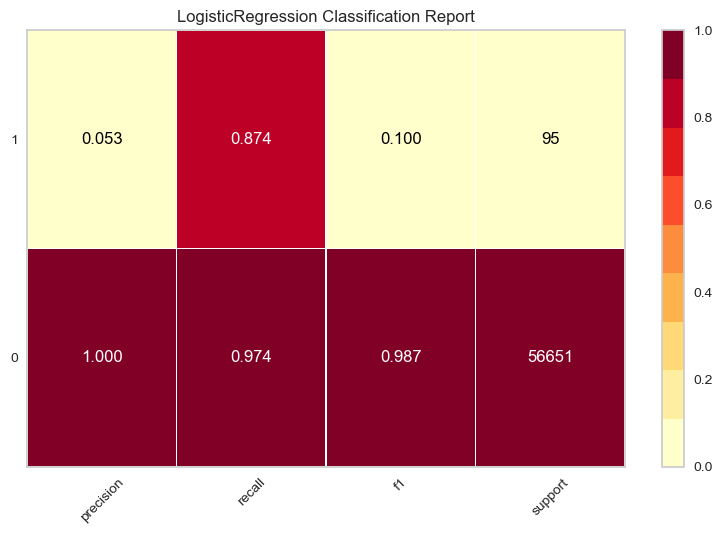

In [32]:
visualizer = ClassificationReport(lr_s, support=True)
visualizer.fit(X_smoted, y_smoted)       
visualizer.score(X_test, y_test)       
visualizer.show();

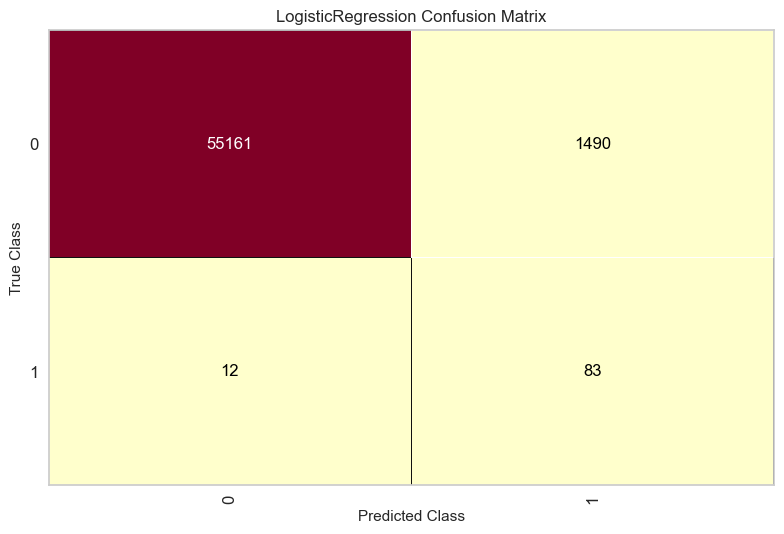

In [33]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(lr_s)
cm.fit(X_smoted, y_smoted)
cm.score(X_test, y_test)
cm.show();

***Plot Precision and Recall Curve***

<Figure size 1000x1000 with 0 Axes>

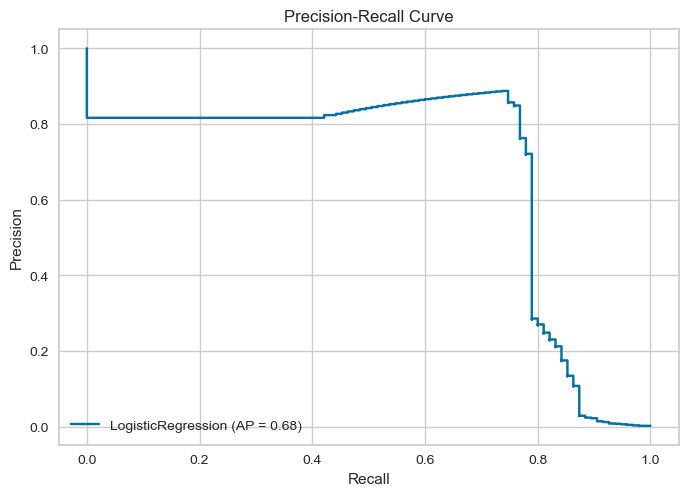

In [34]:
from sklearn.metrics import plot_precision_recall_curve

plt.figure(figsize=(10,10))
disp = plot_precision_recall_curve(lr_s, X_test, y_test)
disp.ax_.set_title('Precision-Recall Curve');

***Apply and Plot StratifiedKFold***

In [35]:
def Evaluation(n, est, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]    

        sm = SMOTE(random_state=42)
        X_smoted, y_smoted = sm.fit_resample(X_train, y_train)
        
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        est = est
        est.fit(X_smoted, y_smoted)
        y_pred = est.predict(X_test)
        acc_scores.append(est.score(X_test, y_test))
        pre_scores.append(precision_score(y_test, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
        
 
    print(f'Accuracy: %{np.mean(acc_scores)*100:.2f} std %{np.std(acc_scores)*100:.2f} \n')
    print(f'Precision 1: %{np.mean(pre_scores)*100:.2f} std %{np.std(pre_scores)*100:.2f} \n')
    print(f'Recall 1: %{np.mean(rec_scores)*100:.2f} std %{np.std(rec_scores)*100:.2f}')
    print(f'F1_score 1: %{np.mean(f1_scores)*100:.2f} std  %{np.std(f1_scores)*100:.2f}') 
    
Evaluation(10, LogisticRegression(), X_scaled, y)


Accuracy: %97.42 std %0.10 

Precision 1: %5.59 std %0.25 

Recall 1: %90.91 std %2.65
F1_score 1: %10.52 std  %0.45


### Random Forest Classifier with SMOTE   

***Model Training***

In [36]:
rf = RandomForestClassifier()
rf.fit(X_smoted , y_smoted)
y_pred = rf.predict(X_test)

***Prediction and Model Evaluating***

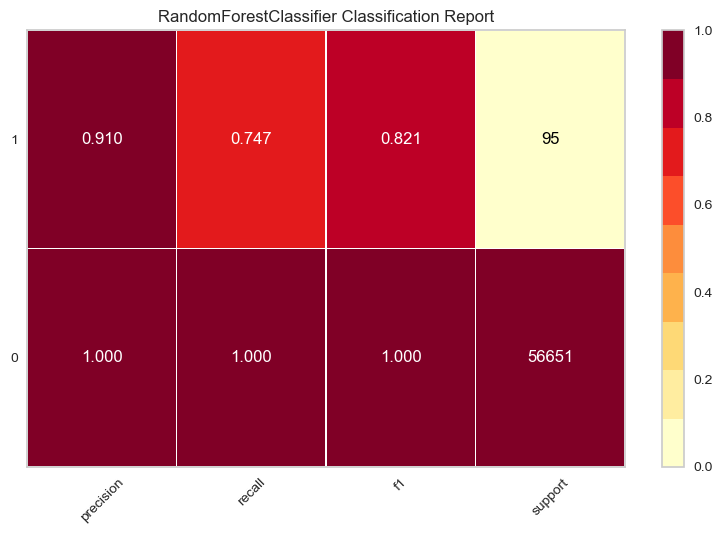

In [37]:
visualizer = ClassificationReport(rf, support=True)
visualizer.fit(X_smoted, y_smoted)       
visualizer.score(X_test, y_test)       
visualizer.show();

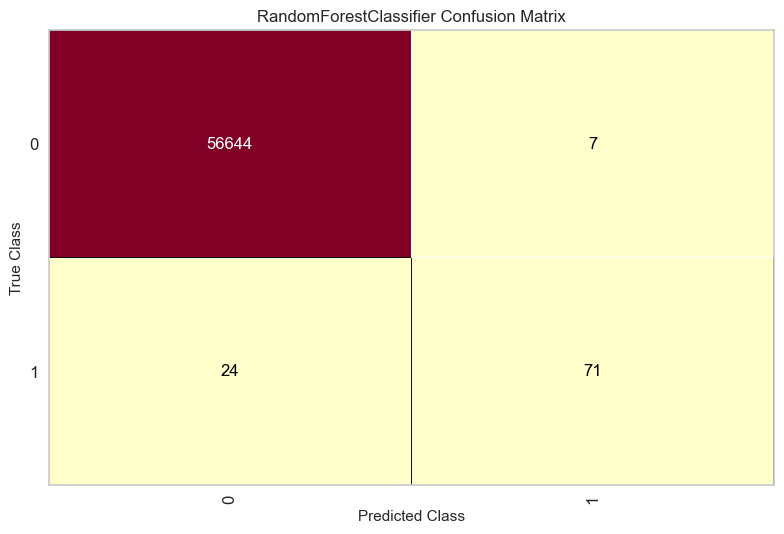

In [38]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf)
cm.fit(X_smoted, y_smoted)
cm.score(X_test, y_test)
cm.show();

***Plot Precision and Recall Curve***

<Figure size 1000x1000 with 0 Axes>

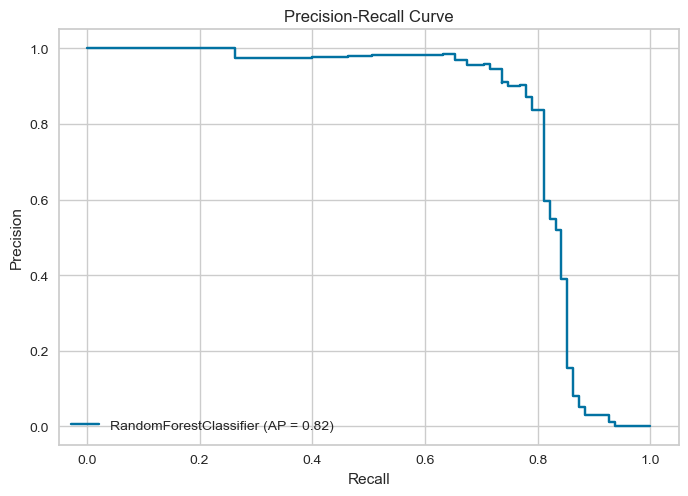

In [39]:
from sklearn.metrics import plot_precision_recall_curve

plt.figure(figsize=(10,10))
disp = plot_precision_recall_curve(rf, X_test, y_test)
disp.ax_.set_title('Precision-Recall Curve');

***Apply and Plot StratifiedKFold***

In [40]:
def Evaluation(n, est, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]    
 
        sm = SMOTE(random_state=42)
        X_smoted, y_smoted = sm.fit_resample(X_train, y_train)
        
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        est = est
        est.fit(X_smoted, y_smoted)
        y_pred = est.predict(X_test)
        
        acc_scores.append(est.score(X_test, y_test))
        pre_scores.append(precision_score(y_test, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
        
    
    print(f'Accuracy: %{np.mean(acc_scores)*100:.2f} std %{np.std(acc_scores)*100:.2f} \n')
    print(f'Precision 1: %{np.mean(pre_scores)*100:.2f} std %{np.std(pre_scores)*100:.2f} \n')
    print(f'Recall 1: %{np.mean(rec_scores)*100:.2f} std %{np.std(rec_scores)*100:.2f}')
    print(f'F1_score 1: %{np.mean(f1_scores)*100:.2f} std  %{np.std(f1_scores)*100:.2f}') 

Evaluation(10, RandomForestClassifier(), X_scaled, y)

Accuracy: %99.95 std %0.01 

Precision 1: %88.40 std %4.68 

Recall 1: %81.63 std %4.03
F1_score 1: %84.75 std  %2.82


***Feature Importance***

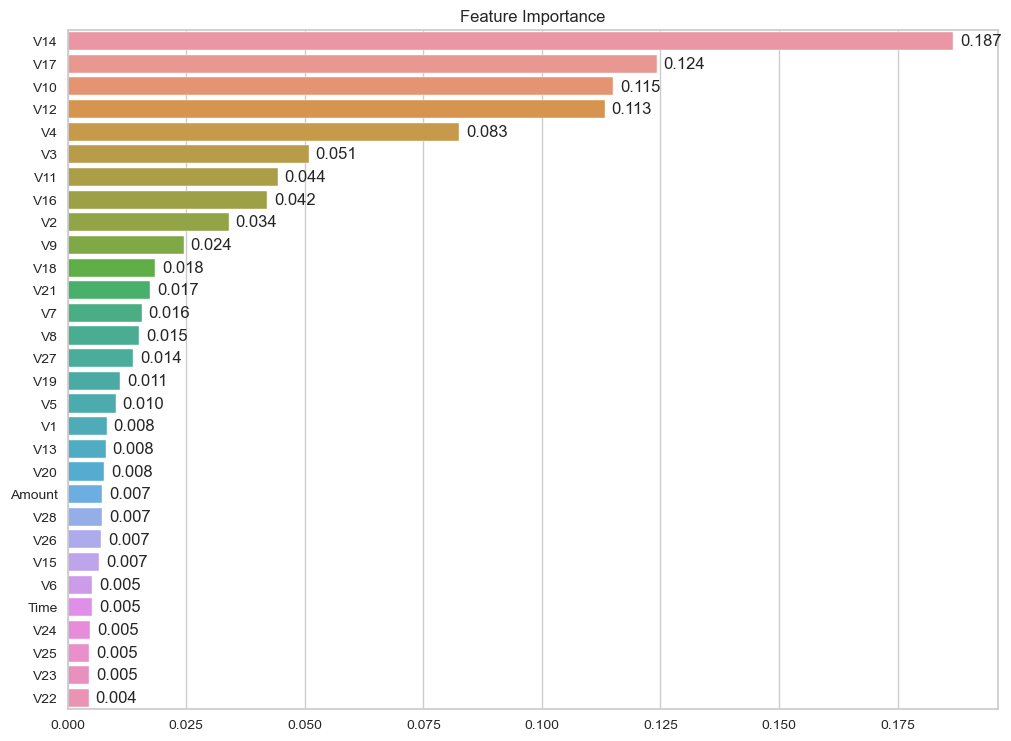

In [41]:
from sklearn.feature_selection import RFE
selector = RFE(rf, n_features_to_select=30, step=10,verbose=2)
selector = selector.fit(X_scaled, y)
selector.support_

features = []
for i in list(enumerate(selector.support_.tolist())):
    if i[1] == True:
        features.append(i[0])
features
X.columns[features]

feature_imp = pd.Series(rf.feature_importances_[features],
                        index=X_smoted.columns[features]).sort_values(ascending=False)
plt.figure(figsize=(12,9))
ax = sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")


for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show();

### Neural Network

In the final step, I will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

***i. Import Libraries***

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPClassifier

***ii. Define Model***

In [43]:
early_stop = EarlyStopping(monitor="val_loss", verbose =2, patience = 10, restore_best_weights=True)
model = Sequential()
model.add(Dense(30,activation='relu')) 
model.add(BatchNormalization())
model.add(Dense(15,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1,activation='sigmoid'))
opt = Adam(learning_rate=0.0001)

***iii. Compile Model***

In [44]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics = ["accuracy"])

***iv. Fit Model***

In [45]:
history = model.fit(x=X_smoted.values, 
          y=y_smoted.values, 
          batch_size = 512,
          epochs=100,
          validation_data=(X_test.values, y_test.values), verbose=1, callbacks = [early_stop])

Epoch 1/100
886/886 [==============================] - 4s 3ms/step - loss: 0.5132 - accuracy: 0.7664 - val_loss: 0.1507 - val_accuracy: 0.9808
Epoch 2/100
886/886 [==============================] - 2s 2ms/step - loss: 0.1553 - accuracy: 0.9521 - val_loss: 0.0936 - val_accuracy: 0.9776
Epoch 3/100
886/886 [==============================] - 2s 2ms/step - loss: 0.0952 - accuracy: 0.9694 - val_loss: 0.0721 - val_accuracy: 0.9784
Epoch 4/100
886/886 [==============================] - 2s 2ms/step - loss: 0.0667 - accuracy: 0.9782 - val_loss: 0.0572 - val_accuracy: 0.9816
Epoch 5/100
886/886 [==============================] - 2s 2ms/step - loss: 0.0492 - accuracy: 0.9843 - val_loss: 0.0469 - val_accuracy: 0.9843
Epoch 6/100
886/886 [==============================] - 2s 2ms/step - loss: 0.0379 - accuracy: 0.9887 - val_loss: 0.0376 - val_accuracy: 0.9875
Epoch 7/100
886/886 [==============================] - 2s 2ms/step - loss: 0.0306 - accuracy: 0.9917 - val_loss: 0.0325 - val_accuracy: 0.9890

***v. Prediction and Model Evaluating***

In [46]:
y_pred = model.predict_classes(X_test.values)

In [47]:
print(classification_report(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.56      0.79      0.65        95

    accuracy                           1.00     56746
   macro avg       0.78      0.89      0.83     56746
weighted avg       1.00      1.00      1.00     56746



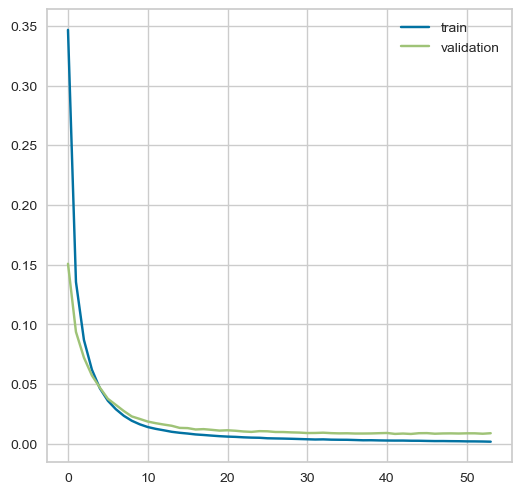

In [48]:
plt.figure(figsize=(6,6))
plt.plot(history.history["loss"], label= "train")
plt.plot(history.history["val_loss"], label= "validation")
plt.legend();

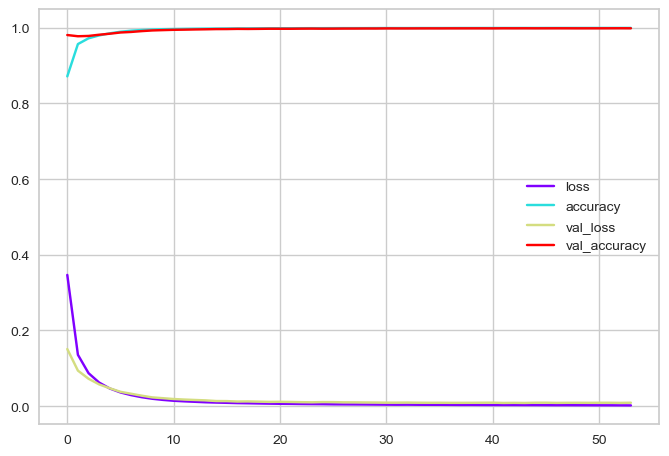

In [49]:
model_loss = pd.DataFrame(history.history)
model_loss.plot(colormap ='rainbow');

***Apply and Plot StratifiedKFold***

In [50]:
def Evaluation(n, X, y):
    
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        model_1 = Sequential()
        model_1.add(Dense(30,activation='relu')) 
        model_1.add(BatchNormalization())
        model_1.add(Dense(15,activation='relu'))
        model_1.add(BatchNormalization())
        model_1.add(Dense(units=1,activation='sigmoid'))
        opt = Adam(learning_rate=0.0001)
      
        model_1.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
        early_stop = EarlyStopping(monitor="val_loss", verbose =0, patience = 10, restore_best_weights=True)
        
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]    
        
        sm = SMOTE(random_state=42)
        X_smoted, y_smoted = sm.fit_resample(X_train, y_train)
              
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        
        
        model_1.fit(x= X_smoted.values, y= y_smoted.values, 
          batch_size = 512,
          epochs=100,
          validation_data=(X_test.values, y_test.values), callbacks = [early_stop], verbose =0)
        
        y_pred = model_1.predict_classes(X_test.values)
        
        
        acc_scores.append(accuracy_score(y_test.values, y_pred))
        pre_scores.append(precision_score(y_test.values, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test.values, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test.values, y_pred, pos_label=1))
        
   
    print(f'Accuracy: %{np.mean(acc_scores)*100:.4f} std %{np.std(acc_scores)*100:.2f} \n')
    
    print(f'Precision 1: %{np.mean(pre_scores)*100:.4f} std %{np.std(pre_scores)*100:.2f} \n')
   
    print(f'Recall 1: %{np.mean(rec_scores)*100:.4f} std %{np.std(rec_scores)*100:.2f} \n')
   
    print(f'F1_score 1: %{np.mean(f1_scores)*100:.4f} std  %{np.std(f1_scores)*100:.2f}') 

Evaluation(5, X_scaled, y)

Accuracy: %99.8717 std %0.02 

Precision 1: %58.4205 std %4.26 

Recall 1: %82.0134 std %3.30 

F1_score 1: %68.1478 std  %3.35


## Final Random Forest Model with Selected Features

In [56]:
X_final = X_scaled[['V14', 'V10', 'V17', 'V4', 'V12', 'V11', 'V16', 'V9','V3','V2']]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify = y, random_state=42)

In [58]:
sm = SMOTE(random_state=42)
X_smote_rf, y_smoted_rf = sm.fit_sample(X_train, y_train)

In [59]:
rf_final = RandomForestClassifier()

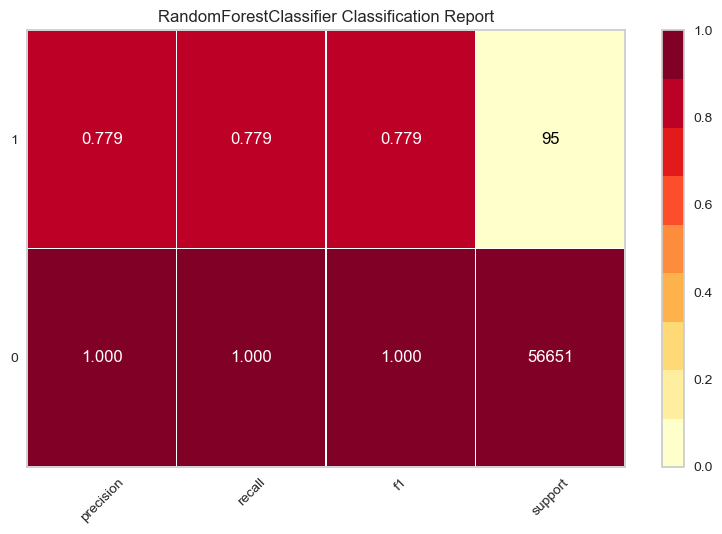

In [60]:
visualizer = ClassificationReport(rf_final, support=True)
visualizer.fit(X_smote_rf, y_smoted_rf)       
visualizer.score(X_test, y_test)       
visualizer.show();

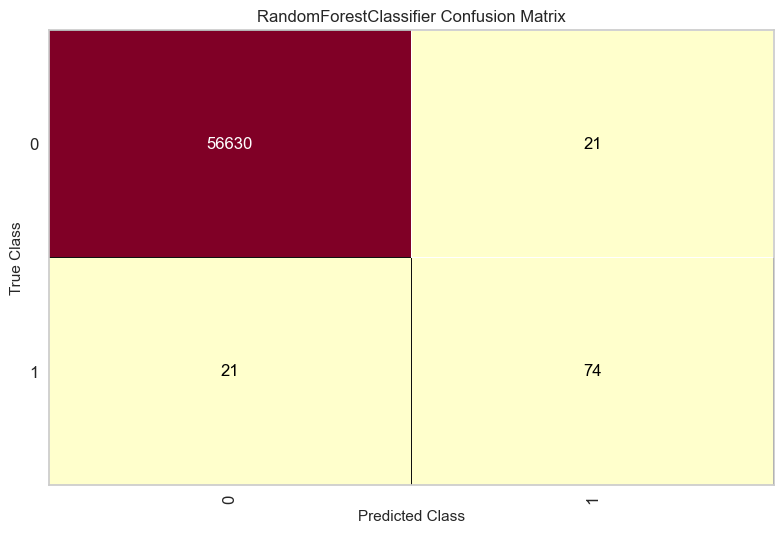

In [61]:
cm = ConfusionMatrix(rf_final)
cm.fit(X_smote_rf, y_smoted_rf)
cm.score(X_test, y_test)
cm.show();

***vi. Plot Precision and Recall Curve***

<Figure size 1000x1000 with 0 Axes>

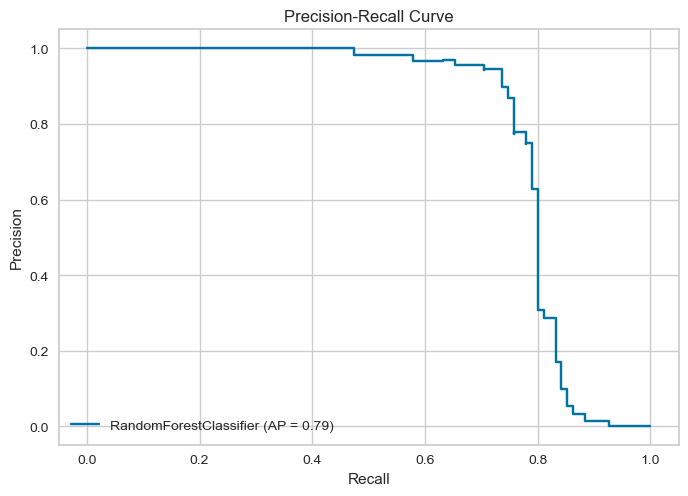

In [62]:
from sklearn.metrics import plot_precision_recall_curve

plt.figure(figsize=(10,10))
disp = plot_precision_recall_curve(rf_final, X_test, y_test)
disp.ax_.set_title('Precision-Recall Curve');

***Apply and Plot StratifiedKFold***

In [63]:
def Evaluation(n, est, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y): 
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index] 
        
        sm = SMOTE(random_state=42)
        X_smt, y_smt = sm.fit_sample(X_train, y_train)
 
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        est = est
        est.fit(X_smt, y_smt)
        y_pred = est.predict(X_test)
        acc_scores.append(est.score(X_test, y_test))
        pre_scores.append(precision_score(y_test, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
        
    
    print(f'Accuracy: %{np.mean(acc_scores)*100:.2f} std %{np.std(acc_scores)*100:.2f} \n')
    print(f'Precision 1: %{np.mean(pre_scores)*100:.2f} std %{np.std(pre_scores)*100:.2f} \n')
    print(f'Recall 1: %{np.mean(rec_scores)*100:.2f} std %{np.std(rec_scores)*100:.2f}')
    print(f'F1_score 1: %{np.mean(f1_scores)*100:.2f} std  %{np.std(f1_scores)*100:.2f}') 

Evaluation(5, RandomForestClassifier(), X_final, y)

Accuracy: %99.93 std %0.01 

Precision 1: %77.74 std %5.59 

Recall 1: %80.54 std %2.26
F1_score 1: %78.96 std  %2.62


## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to *Pycharm* or *VSCode* and create your web app with Flask API.

### Save and Export the Model as .pkl


In [64]:
import pickle 
pickle.dump(rf_final, open("random_forest", 'wb'))

In [65]:
pickle.dump(X_final.columns, open('features.pkl', 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___